In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5
fig_height = 4
fig_format = :png
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


ERROR: LoadError: InitError: 

could not load library "/home/alf/.julia/artifacts/136b88dafbb4b6b7bfa6d4cff225f7d697015bd1/lib/libpango-1.0.so"
/home/alf/.julia/artifacts/136b88dafbb4b6b7bfa6d4cff225f7d697015bd1/lib/libpango-1.0.so: undefined symbol: hb_ot_color_has_paint
Stacktrace:
  [1] dlopen(s::String, flags::UInt32; throw_error::Bool)
    @ Base.Libc.Libdl ./libdl.jl:117
  [2] dlopen(s::String, flags::UInt32)
    @ Base.Libc.Libdl ./libdl.jl:116
  [3] macro expansion
    @ ~/.julia/packages/JLLWrappers/pG9bm/src/products/library_generators.jl:63 [inlined]
  [4] __init__()
    @ Pango_jll ~/.julia/packages/Pango_jll/myhU0/src/wrappers/x86_64-linux-gnu.jl:16
  [5] run_module_init(mod::Module, i::Int64)
    @ Base ./loading.jl:1134
  [6] register_restored_modules(sv::Core.SimpleVector, pkg::Base.PkgId, path::String)
    @ Base ./loading.jl:1122
  [7] _include_from_serialized(pkg::Base.PkgId, path::String, ocachepath::String, depmods::Vector{Any})
    @ Base ./loading.jl:1067
  [8] _require_search_from_serialized(

ERROR: 

LoadError: 

Failed to precompile Cairo [159f3aea-2a34-519c-b102-8c37f9878175] to "/home/alf/.julia/compiled/v1.10/Cairo/jl_0Ypmps".
Stacktrace:
  [1] error(s::String)
    @ Base ./error.jl:35
  [2] compilecache(pkg::Base.PkgId, path::String, internal_stderr::IO, internal_stdout::IO, keep_loaded_modules::Bool)
    @ Base ./loading.jl:2468
  [3] compilecache
    @ ./loading.jl:2340 [inlined]
  [4] 

(::Base.var"#968#969"{Base.PkgId})()
    @ Base ./loading.jl:1974
  [5] mkpidlock(f::Base.var"#968#969"{Base.PkgId}, at::String, pid::Int32; kwopts::@Kwargs{stale_age::Int64, wait::Bool})
    @ FileWatching.Pidfile ~/.julia/juliaup/julia-1.10.5+0.x64.linux.gnu/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:93
  [6] #mkpidlock#6
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.linux.gnu/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:88 [inlined]
  [7] trymkpidlock(::Function, ::Vararg{Any}; kwargs::@Kwargs{stale_age::Int64})
    @ FileWatching.Pidfile ~/.julia/juliaup/julia-1.10.5+0.x64.linux.gnu/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:111
  [8] #invokelatest#2
    @ ./essentials.jl:894 [inlined]
  [9] invokelatest
    @ ./essentials.jl:889 [inlined]
 [10] maybe_cachefile_lock(f::Base.var"#968#969"{Base.PkgId}, pkg::Base.PkgId, srcpath::String; stale_age::Int64)
    @ Base ./loading.jl:2983
 [11] maybe_cachefile_lock
    @ ./loading.jl:2980 [inlined]
 [12] _require(pkg

In [2]:
a(n) = 2n + 1
println([a(n) for n = 1:10])

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [3]:
# Como reales
a(n) = 1 / n
println([a(n) for n = 1:10])
# Como racionales
a(n) = 1//n
println([a(n) for n = 1:10])

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]
Rational{Int64}

[1, 1//2, 1//3, 1//4, 1//5, 1//6, 1//7, 1//8, 1//9, 1//10]


In [4]:
a(n) = (-1)^n
println([a(n) for n = 1:10])

[-1, 1, -1, 1, -1, 1, -1, 1, -1, 1]


In [5]:
a(n) = (1 + 1 / n)^n
println([a(n) for n = 1:10])

[2.0, 2.25, 2.3703703703703702, 2.44140625, 2.4883199999999994, 2.5216263717421135, 2.546499697040712, 2.565784513950348, 2.5811747917131984, 2.5937424601000023]


In [6]:
a(n) = n == 1 ? 1 : sqrt(1+a(n-1))
println([a(n) for n = 1:10])

Real[1, 1.4142135623730951, 1.5537739740300374, 1.5980531824786175, 1.6118477541252516, 1.616121206508117, 1.6174427985273905, 1.617851290609675, 1.6179775309347393, 1.6180165422314876]


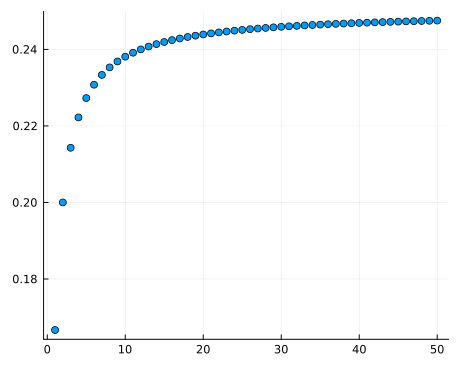

In [7]:
using Plots
a(n) = n / (4n + 2)
scatter([a(n) for n = 1:50], legend=false)

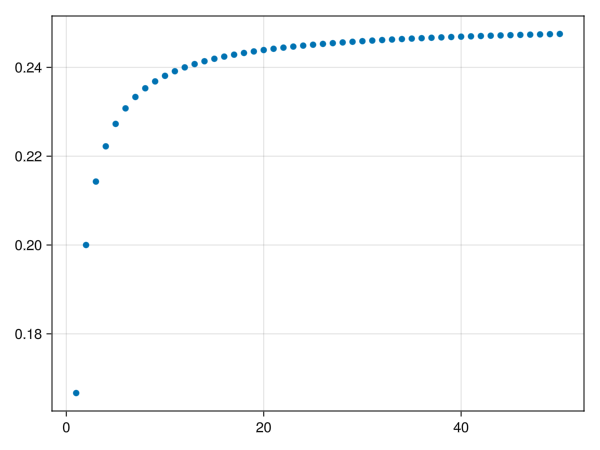

In [8]:
using GLMakie
a(n) = n / (4n + 2)
Makie.scatter([a(n) for n = 1:50])

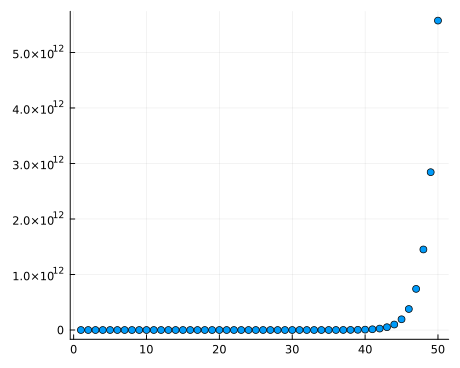

In [9]:
using Plots
a(n) = 2^n / (4n + 2)
scatter([a(n) for n = 1:50], legend=false)

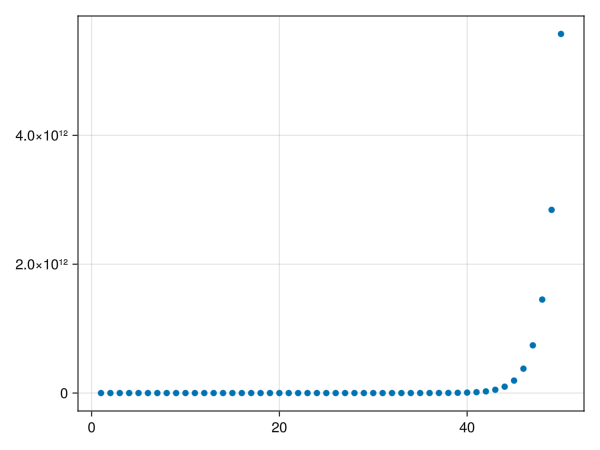

In [10]:
using GLMakie
a(n) = 2^n / (4n + 2)
Makie.scatter([a(n) for n = 1:50])

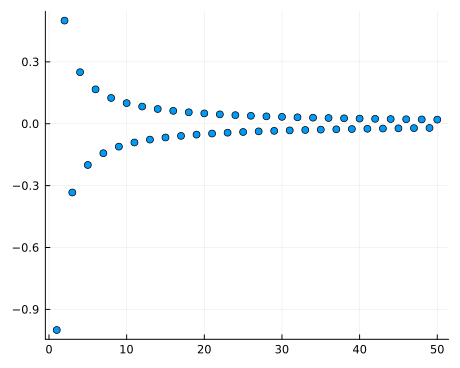

In [11]:
using Plots
a(n) = (-1)^n / n
scatter([a(n) for n = 1:50], legend=false)

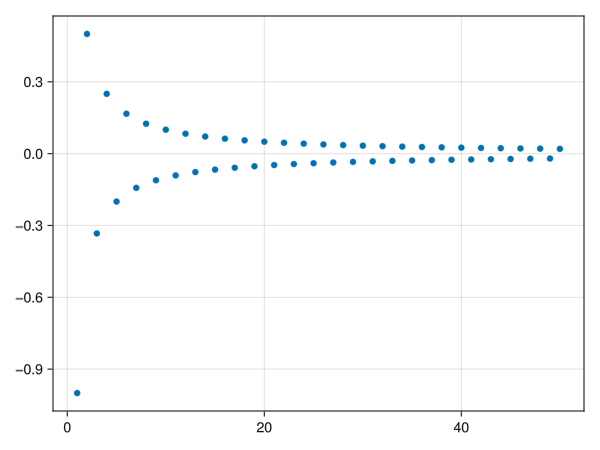

In [12]:
using GLMakie
a(n) = (-1)^n / n
Makie.scatter([a(n) for n = 1:50])

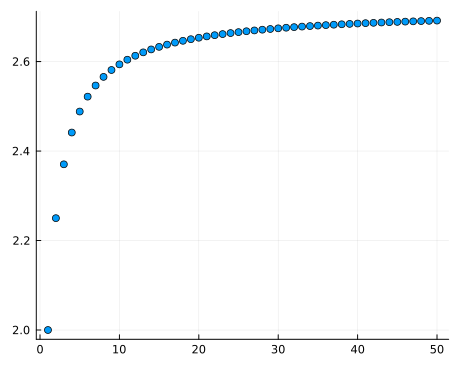

In [13]:
using Plots
a(n) = (1 + 1 / n)^n
scatter([a(n) for n = 1:50], legend=false)

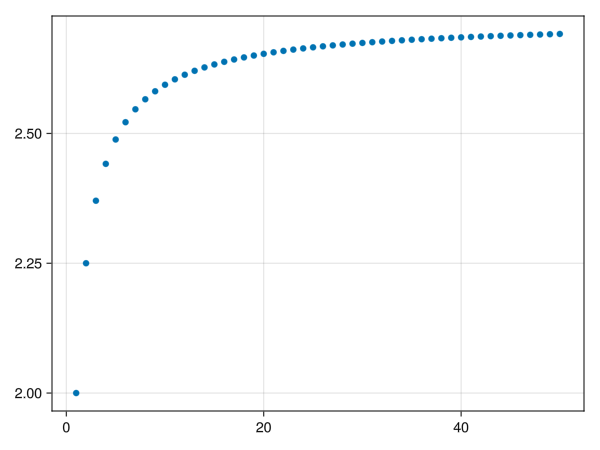

In [14]:
using GLMakie
a(n) = (1 + 1 / n)^n
Makie.scatter([a(n) for n = 1:50])

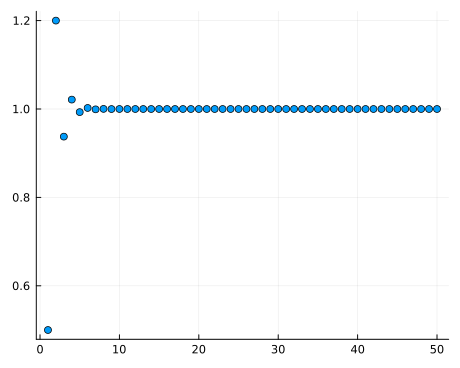

In [15]:
using Plots
a(n) =  n == 1 ? 0.5 : 3/(2+a(n-1))
scatter([a(n) for n = 1:50], legend=false)

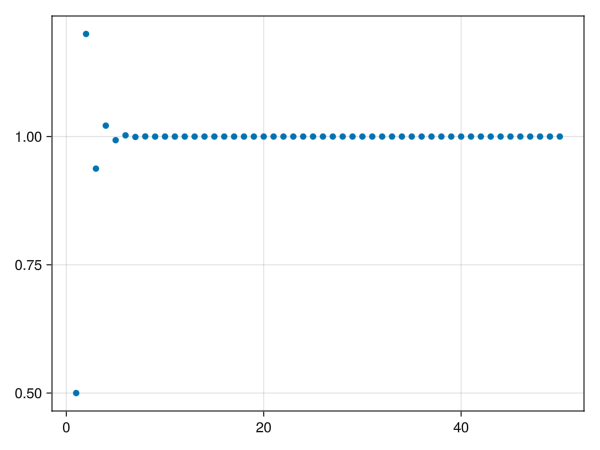

In [16]:
using GLMakie
a(n) = n == 1 ? 0.5 : 3/(2+a(n-1))
Makie.scatter([a(n) for n = 1:50])

In [17]:
using SymPy
@syms n  # Declaración de la variable simbólica n.
a(n) = 1/n
limit(a(n), n=>oo)

0

In [18]:
@syms n
a(n) = (-1)^n
limit(a(n), n=>oo)

nan

In [19]:
@syms n
a(n) = (1 + 1 / n)^n
limit(a(n), n=>oo)

ℯ

In [20]:
p(n) = 2n*sin(pi/n)
println([p(10^i) for i = 1:6])

[6.180339887498948, 6.282151815625658, 6.283174971759127, 6.28318520382533, 6.283185306146043, 6.283185307169251]


In [21]:
a(n) = n*sin(2*pi/n)/2
println([a(10^i) for i = 1:6])

[2.938926261462366, 3.1395259764656687, 3.1415719827794755, 3.141592446881286, 3.141592651522708, 3.1415926535691225]


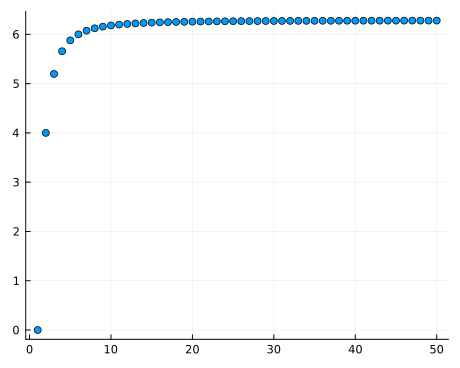

In [22]:
using Plots
a(n) = 2n*sin(pi/n)
scatter([a(n) for n = 1:50], legend=false)

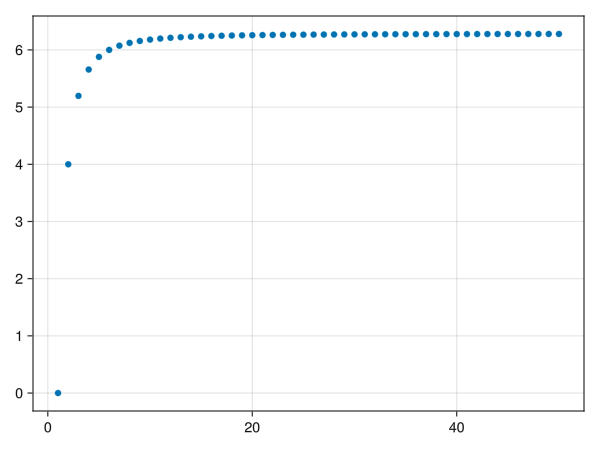

In [23]:
using GLMakie
a(n) = 2n*sin(pi/n)
Makie.scatter([a(n) for n = 1:50])

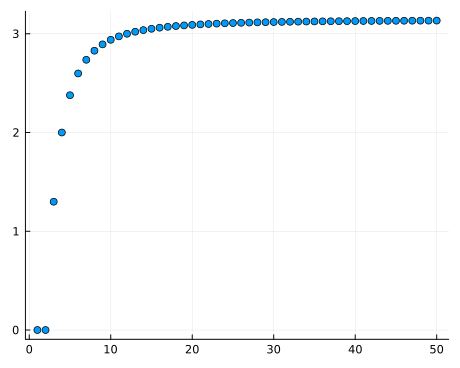

In [24]:
using Plots
a(n) = n*sin(2*pi/n)/2
scatter([a(n) for n = 1:50], legend=false)

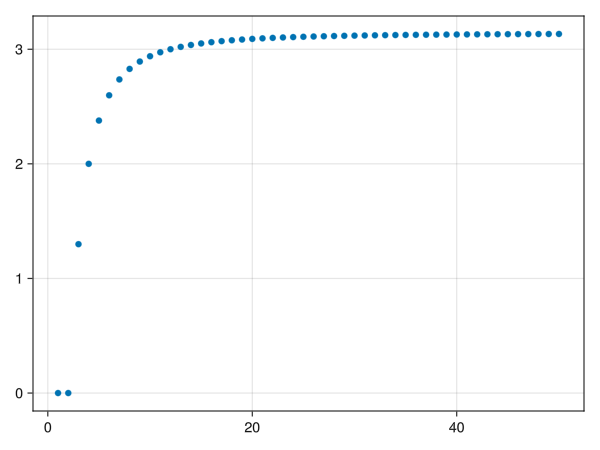

In [25]:
using GLMakie
a(n) = n*sin(2*pi/n)/2
Makie.scatter([a(n) for n = 1:50])

In [26]:
using SymPy
@syms n
a(n) = 2n*sin(PI/n)  # Para cálculo simbólico es mejor utilizar la constante simbólica PI en lugar de pi.
limit(a(n), n=>oo)

2⋅π

In [27]:
using SymPy
@syms n, r
a(n) = 2n*r*sin(PI/n)
limit(a(n), n=>oo)

2⋅π⋅r

In [28]:
using SymPy
@syms n
a(n) = n*sin(2*PI/n)/2
limit(a(n), n=>oo)

π

In [29]:
using SymPy
@syms n, r
a(n) = n*r^2*sin(2*PI/n)/2
limit(a(n), n=>oo)

   2
π⋅r 

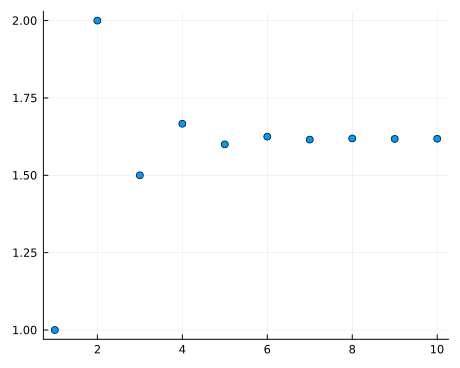

In [30]:
using Plots
a(n) =  n == 1 ? 1 : 1 + 1 / a(n-1)
scatter([a(n) for n = 1:10], legend=false)

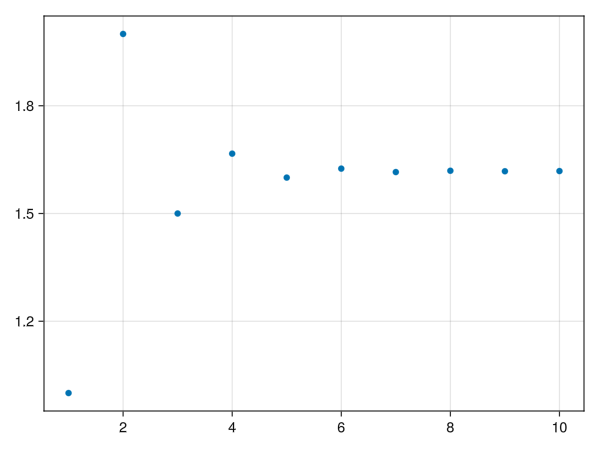

In [31]:
using GLMakie
a(n) = n == 1 ? 1 : 1 + 1 / a(n-1)
Makie.scatter([a(n) for n = 1:10])

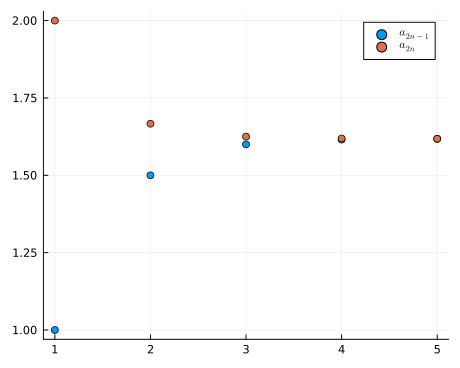

In [32]:
using Plots, LaTeXStrings
a(n) =  n == 1 ? 1 : 1 + 1 / a(n-1)
Plots.scatter([a(2i-1) for i=1:5], label = L"$a_{2n-1}$")
Plots.scatter!([a(2i) for i=1:5], label = L"$a_{2n}$")

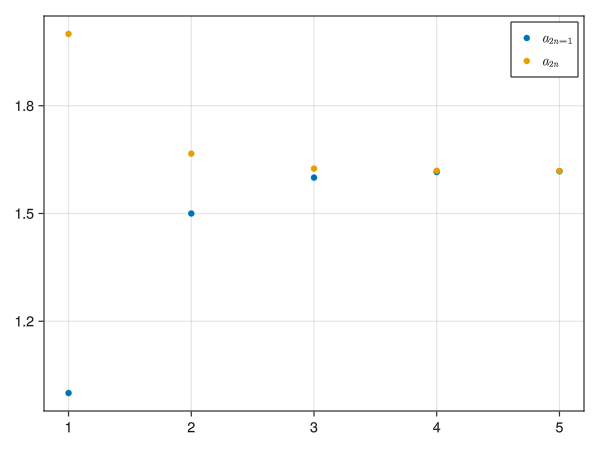

In [33]:
using GLMakie
a(n) = n == 1 ? 1 : 1 + 1 / a(n-1)
fig, ax = Makie.scatter([a(2i-1) for i = 1:5], label = L"$a_{2n-1}$" )
Makie.scatter!(ax,[a(2i) for i=1:5], label = L"$a_{2n}$")
axislegend()
fig

In [34]:
#| echo: false
using QuizQuestions
nothing

In [35]:
#| echo: false
a(n)=(3n^2+n)/(6n^2-1)
numericq(a(10), 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(0.5175292153589316, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [36]:
#| echo: false
choices = ("0", "0.5", "1", "1.5", "No converge")
answer = 2
radioq(choices, answer)

QuizQuestions.Radioq(("0.5", "1", "0", "No converge", "1.5"), 1, [1, 2, 3, 4, 5], ("0.5", "1", "0", "No converge", "1.5"), "", "", "", false)

QuizQuestions.HotspotQ("img/sucesiones/graficas-sucesiones.png", (0, 0.5), (0, 0.5), "", "", "", nothing)
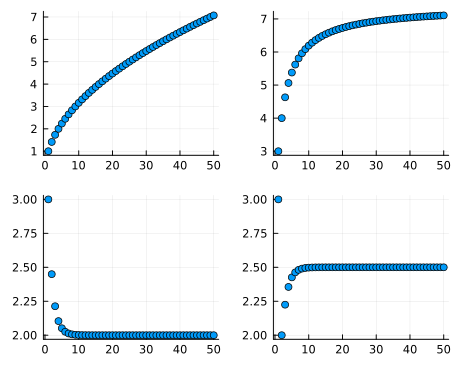

In [37]:
#| echo: false
using Plots
a(n) = n==1 ? 3 : sqrt(2a(n-1))
y(n) = n==1 ? 3 : 1 + 3/a(n-1)
p1 = Plots.scatter([sqrt(n) for n=1:50], legend=false)
p2 = Plots.scatter([(1+2/n)^n for n=1:50], legend=false)
p3 = Plots.scatter([a(n) for n=1:50], legend=false)
p4 = Plots.scatter([y(n) for n=1:50], legend=false)
l = @layout [a b; c d]
p1 = Plots.plot(p1, p2, p3, p4, layout=l)
imgfile = "img/sucesiones/graficas-sucesiones.png"
savefig(p1, imgfile)
hotspotq(imgfile, (0,1/2), (0, 1/2))

In [38]:
#| echo: false
yesnoq("yes")

QuizQuestions.Radioq(["Yes", "No"], 1, [1, 2], ["Yes", "No"], "", "", "", false)

In [39]:
#| echo: false
yesnoq("no")

QuizQuestions.Radioq(["Yes", "No"], 2, [1, 2], ["Yes", "No"], "", "", "", false)

In [40]:
#| echo: false
yesnoq("yes")

QuizQuestions.Radioq(["Yes", "No"], 1, [1, 2], ["Yes", "No"], "", "", "", false)

In [41]:
#| echo: false
numericq(exp(2), 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(7.38905609893065, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)